### **Mehmet Simsek**                                                                                                            

**Spark Internship Assignment-- Classification with Decision Tree**

In [ ]:
# import libaries for read the data and visualize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=iris.drop("Species", axis=1)
y=iris.Species

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

Text(0.5, 15.0, 'Predicted Label')

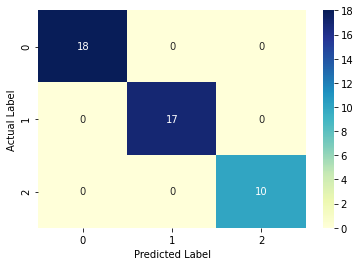

In [ ]:
#visualize prediction accuracy
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
#visualize the tree-version_1
from sklearn import tree
features=list(iris.columns[1:])
targets=["Iris-versicolor", "Iris-virginica", "Iris-setosa"]

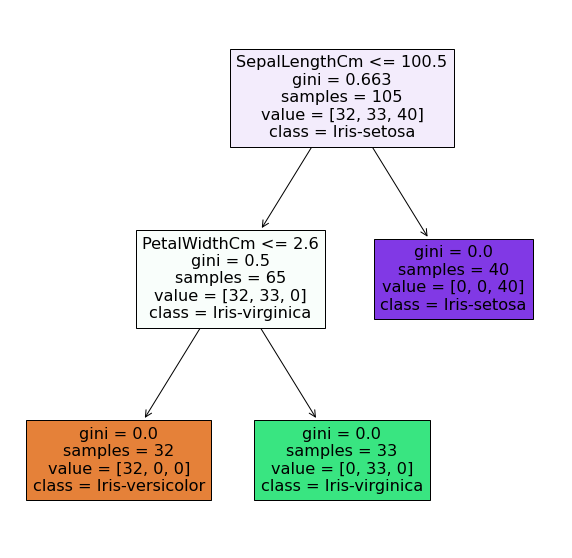

In [ ]:
plt.figure(figsize=(10,10))
tree2 = tree.plot_tree(dt,filled=True,feature_names=features ,class_names = targets)

In [ ]:
# visualize the tree-version_2
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


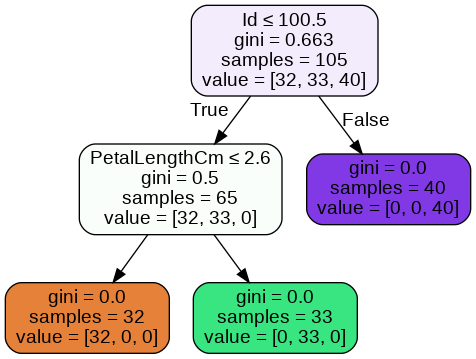

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.columns[:-1],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())